# **INTRODUCTION** :  
A high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights me discover will then help guide marketing strategy for the company.

# **ASK** :
* Buiesness Task : Discovering through these insights can help guide the marketing strategy for the company.
* Key Syakeholder : Urška Sršen, cofounder and Chief Creative Officer
                    Sando Mur: Mathematician and cofounder
                    marketing analytics team
                    


# **PREPARE** : 

* Data Source : Link -> https://www.kaggle.com/datasets/arashnic/fitbit. 
* Data credibility : Good condition.
* ROCCC Analysis : 1.Reliability - Reliable
                    2.Original - Yes
                    3.Comprhensive : It is not 100% comprehensive as some information is missing
                    4.Current - 6 years  old
                    5.Cited - Yes 

# **PROCESS** :

In [1]:
# Helps  wrangle Data 
library(tidyverse)

# helps wrangle date and time
library(lubridate)

# get summary data
library(skimr)
library(janitor)
library(dplyr)
library(ggplot2)
library(readxl)
install.packages("xlsx")
library(xlsx)
 # collecting Data

Daily_activity <- read.csv('../input/daily-activity/dailyActivity_merged.csv')

 

# **CLEAN** :

In [ ]:
# Adjusting Data format in proper way and also converting data variable fro chr to Posidx
  Daily_activity$ActivityDate <- as.POSIXct.Date(Daily_activity$ActivityDate)
Daily_activity$ActivityDate <- as.Date.character(Daily_activity$ActivityDate,"%m%d%y")

# Merging two tables by referring two columns and X= True function indicate it include all X table rows and only matching Y table rows
Daily_activity_2 <- merge(x= Daily_activity,y=Daily_activity_Bed,by.x = c("Id","ActivityDate"),by.y = c("Id","SleepDay"),all.x=TRUE)

# creating categories
## Sleep into <6 hr, 6-8hr, >8hr
## Calories into <1500, 1500-2500, >2500
## Distance into <5km, 5-10km, >10km

Daily_activity_2 <- Daily_activity_2 %>% 
  mutate(sleep_category = case_when(TotalMinutesAsleep>360 & TotalMinutesAsleep <= 480 ~ "6h-8h",
                                    TotalMinutesAsleep >480 ~ ">8h", TRUE ~ "<6h")) %>% 
  mutate(Calories_category = case_when(Calories >1500 & Calories <= 2500 ~ "1.5k-2.5k",
                                       Calories>2500 ~ "2.5k",TRUE~"< 1.5k")) %>% 
  mutate(Distance_category = case_when(TotalDistance >5 & TotalDistance<=10 ~ "5km-10km",
                                       TotalDistance >10 ~ ">10km", TRUE ~ "<5km"))


# **ANALYSIS AND SHARE** :

In [ ]:
# Calorie vs Total steps
ggplot(data=Daily_activity,aes(x= TotalSteps,y=Calories)) + geom_point()+ stat_smooth(method = lm)+
  labs(title ="Total steps vs Calorie Burn") + xlab("Total Steps") + ylab ("Calories")


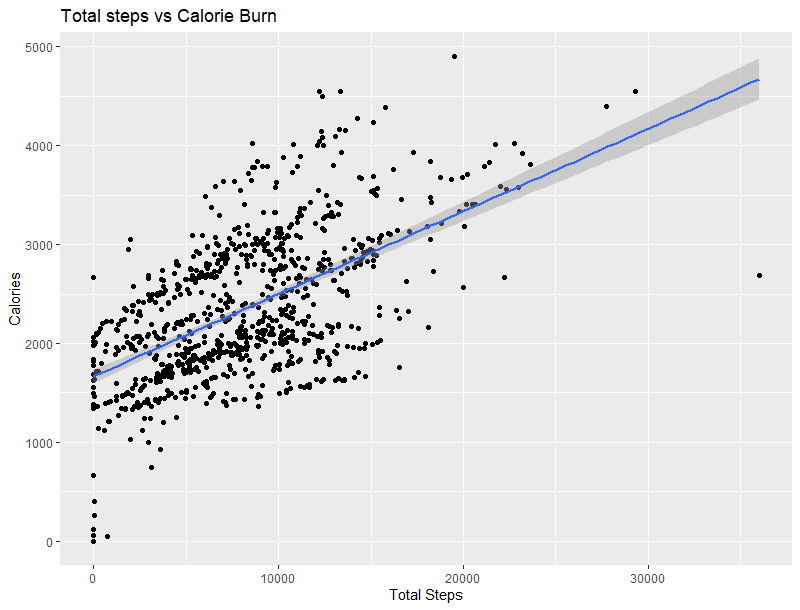

##### It shows a positive relationship. Calories burn more when total steps increase

In [ ]:
# Total time A sleep vs Total time in Bed
ggplot(data=Daily_activity_2,aes(x= TotalMinutesAsleep,y=TotalTimeInBed)) + geom_point()+ stat_smooth(method = lm)+
  labs(title ="Total time A sleep vs Total time in Bed") + xlab("Total time of sleep") +ylab("Total time in Bed")


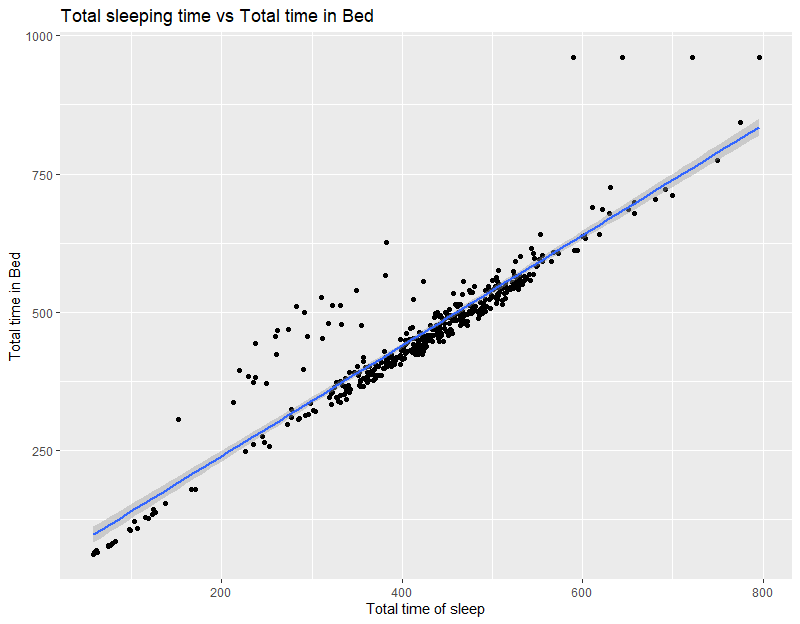